## Analysis of Liquidators' Behavior in Lending Protocols

##### Introduction
In this analysis, I examined the behavior of liquidators across multiple lending protocols. The analysis covers data from five distinct lending 
protocols: zkLend, Nostra Alpha, Nostra Mainnet, Hashstack v0, and Hashstack v1.

##### Data SourcesIe utilized` event samplesparquet`  from the following Google Storag link that was provided and and `loan parquet`.


#### Data Processing
We consolidated data from all protocols into a single dataframe, adding a 'Protocol' column to distinguish events from different protocols.

###  Analysis and Visualization:

1. `Number of Liquidators per Protocol`: I counted the unique liquidators (from_address) for each protocol.
2. `Cross-Protocol Operations`: I identified liquidators operating across multiple protocols.
3. `Loans Liquidated by Each Liquidator`: I counted the number of loans liquidated by each liquidator.
4. `Amount of Liquidated Debt`: I computed the total and per-token amounts of liquidated debt.

i used Pandas, pandas as pd, pyarrow.parquet as pq, requests, matplotlib.pyplot as plt, seaborn as sns and io library to actualize the work.

ebt.


### Loading path for MySQL 

In [ ]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # Only needed for Jupyter Notebook

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='your_host',
    user='your_username',
    password='your_password',
    database='loans_db'
)

# List of protocols (table names in the MySQL database)
protocols = ["zklend", "nostra_alpha", "nostra_mainnet", "hashstack_v0", "hashstack_v1"]

for protocol in protocols:
    print(f"Processing {protocol}...")
    
    # Query the data from the MySQL database
    query = f"SELECT * FROM {protocol}"
    df = pd.read_sql_query(query, conn)
    
    pd.set_option('display.max_columns', None)  # Display all columns
    pd.set_option('display.max_colwidth', None)  # Display full column width
    pd.set_option('display.width', None)  # Adjust display width

    # Display the first rows
    display(df.head())

# Close the connection
conn.close()

### Loading path for SQLite3

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # Only needed for Jupyter Notebook

# Connect to the SQLite database
conn = sqlite3.connect('loans.db')

# List of protocols (table names in the SQLite database)
protocols = ["zklend", "nostra_alpha", "nostra_mainnet", "hashstack_v0", "hashstack_v1"]

for protocol in protocols:
    print(f"Processing {protocol}...")
    
    # Query the data from the SQLite database
    query = f"SELECT * FROM {protocol}"
    df = pd.read_sql_query(query, conn)
    
    pd.set_option('display.max_columns', None)  # Display all columns
    pd.set_option('display.max_colwidth', None)  # Display full column width
    pd.set_option('display.width', None)  # Adjust display width

    # Display the first rows
    display(df.head())

# Close the connection
conn.close()


### Loading data from Google Storage 

In [1]:
import pandas as pd
import pyarrow.parquet as pq
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO

# URLs of the events sample files for all lending protocols
parquet_urls = {
    "zklend": "https://storage.googleapis.com/derisk-persistent-state/zklend_data/events_sample.parquet",
    "nostra_alpha": "https://storage.googleapis.com/derisk-persistent-state/nostra_alpha_data/events_sample.parquet",
    "nostra_mainnet": "https://storage.googleapis.com/derisk-persistent-state/nostra_mainnet_data/events_sample.parquet",
    "hashstack_v0": "https://storage.googleapis.com/derisk-persistent-state/hashstack_v0_data/events_sample.parquet",
    "hashstack_v1": "https://storage.googleapis.com/derisk-persistent-state/hashstack_v1_data/events_sample.parquet"
}

dataframes_ep = {}

for protocol, url in parquet_urls.items():
    # Download the file
    response = requests.get(url)
    response.raise_for_status()  # Ensure the request was successful

    # Read the Parquet file into a Pandas DataFrame
    with BytesIO(response.content) as f:
        table = pq.read_table(f)
        df_ep = table.to_pandas()
    
    # Add a column for the protocol
    df_ep['Protocol'] = protocol
    
    # Store dataframe in dictionary
    dataframes_ep[protocol] = df_ep

In [2]:
df_ep

,block_hash,block_number,transaction_hash,event_index,from_address,keys,data,timestamp,key_name,order,Protocol
0,0x068b04151068a7acc1f72c9b2023e176037cb6bce171...,273262,0x0676e3ae850f6fae3da1269b9c390f74c26eb1948ca2...,21,0x012b8185e237dd0340340faeb3351dbe53f8a42f5a9b...,"b'[""0x18b6525ecb6302165c034d5ae6831237f6b0e92f...","b'[""0x1"",""0x251e01d33f75076732f5c7c671d1e6918f...",1695977183,new_loan,0.0,hashstack_v1
1,0x06c263286120af7afb020f535cd53e17da319df84350...,273300,0x06ebb5723abf3878214b66bd4bbe7087280707da7231...,9,0x01ef7f9f8bf01678dc6d27e2c26fb7e8eac3812a2475...,"b'[""0x18b6525ecb6302165c034d5ae6831237f6b0e92f...","b'[""0x2"",""0x251e01d33f75076732f5c7c671d1e6918f...",1695977763,new_loan,0.0,hashstack_v1
2,0x07d0f1faf834b7906e4de54c440d0aa35112bc1a243c...,273372,0x0051f75ef1e08f70d1c8efe7866384d026aa0ca092de...,25,0x012b8185e237dd0340340faeb3351dbe53f8a42f5a9b...,"b'[""0x8ec0ef7812932198b471e7a74f46d868b2d6f5ff...","b'[""0x1"",""0x251e01d33f75076732f5c7c671d1e6918f...",1695978978,loan_spent,1.0,hashstack_v1
3,0x06f650deb66bb602f02bd87f29aa7c28909b126f9d7c...,273387,0x01bf0af4c1922e2b8cc523e6e088d72885701e941605...,12,0x012b8185e237dd0340340faeb3351dbe53f8a42f5a9b...,"b'[""0x3a0bcdfe321e4020189044810e380d888ac9a9ef...","b'[""0x1"",""0x5fa6cc6185eab4b0264a4134e2d4e74be1...",1695979201,collateral_added,6.0,hashstack_v1
4,0x06384cf4b11477d048623b43e45970c5a4a106537065...,273396,0x0389888c9ef7dfe1491a3d15afa79b565bc52dccb01d...,0,0x012b8185e237dd0340340faeb3351dbe53f8a42f5a9b...,"b'[""0x3a0bcdfe321e4020189044810e380d888ac9a9ef...","b'[""0x1"",""0x5fa6cc6185eab4b0264a4134e2d4e74be1...",1695979342,collateral_added,6.0,hashstack_v1
...,...,...,...,...,...,...,...,...,...,...,...
4248,0x0636645121a647181fb5cf8c8c0d711d3b8ec215b947...,644532,0x004d06b9b82e9085b72277e8925cda336ad80245872a...,14,0x021d8d8519f5464ec63c6b9a80a5229c5ddeed57ecde...,"b'[""0x8ec0ef7812932198b471e7a74f46d868b2d6f5ff...","b'[""0x6aa"",""0x6ff0c8c78b967470098873c5eb462608...",1716975796,loan_spent,1.0,hashstack_v1
4249,0x07effca02bf20e4507cd4a87169fde845f728bd998c1...,644567,0x070d6757cb75909e17adc918a4f475afa20c14282a19...,10,0x01ef7f9f8bf01678dc6d27e2c26fb7e8eac3812a2475...,"b'[""0x18b6525ecb6302165c034d5ae6831237f6b0e92f...","b'[""0x6ab"",""0x3ada404dc17748a2b47d40f85fc13c38...",1716988813,new_loan,0.0,hashstack_v1
4250,0x04c9e7ed78d0a27a1c61a4fa17685b938fde07bda990...,644574,0x052a3efe1dd8334815b06428d3e492701d322895c0b7...,14,0x01ef7f9f8bf01678dc6d27e2c26fb7e8eac3812a2475...,"b'[""0x8ec0ef7812932198b471e7a74f46d868b2d6f5ff...","b'[""0x6ab"",""0x3ada404dc17748a2b47d40f85fc13c38...",1716991344,loan_spent,1.0,hashstack_v1
4251,0x02ae4e562ebc9ff895829db75f4417f6d611521939f5...,644577,0x057d280974f534b3e33286e8c8ec9d973775b57e774f...,16,0x01ef7f9f8bf01678dc6d27e2c26fb7e8eac3812a2475...,"b'[""0x8ec0ef7812932198b471e7a74f46d868b2d6f5ff...","b'[""0x6ab"",""0x3ada404dc17748a2b47d40f85fc13c38...",1716992447,loan_spent,1.0,hashstack_v1


In [3]:
# Combine all dataframes into a single dataframe
ep_data = pd.concat(dataframes_ep.values(), ignore_index=True)
ep_data.columns

Index(['block_hash', 'block_number', 'transaction_hash', 'event_index',
       'from_address', 'keys', 'data', 'timestamp', 'key_name', 'Protocol',
       'order'],
      dtype='object')

### Exploratory Data Analysis: 
***
We are going to Visualize the behavior of all liquidators found in our sample. We want to see the distribution of distributors accross different protocols

***

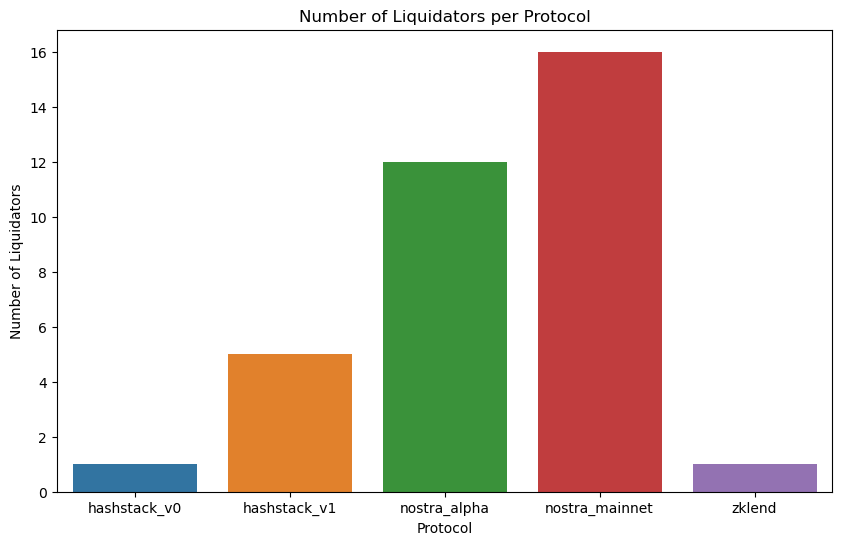

In [4]:
# Group by 'User' and 'Protocol' to get the number of liquidators per protocol
liquidators_per_protocol = ep_data.groupby('Protocol')['from_address'].nunique().reset_index()
liquidators_per_protocol.columns = ['Protocol', 'Number of Liquidators']

# Check if some liquidators operate on more than one protocol
multi_protocol_liquidators = ep_data.groupby('from_address')['Protocol'].nunique()
multi_protocol_liquidators = multi_protocol_liquidators[multi_protocol_liquidators > 1].count()

# Plot the number of liquidators per protocol
plt.figure(figsize=(10, 6))
sns.barplot(x='Protocol', y='Number of Liquidators', data=liquidators_per_protocol)
plt.title('Number of Liquidators per Protocol')
plt.xlabel('Protocol')
plt.ylabel('Number of Liquidators')
plt.show()

***
#### How many liquidators are there per protocol? 
***

In [5]:
# Display the liquidators per protocol table
print(liquidators_per_protocol)


         Protocol  Number of Liquidators
0    hashstack_v0                      1
1    hashstack_v1                      5
2    nostra_alpha                     12
3  nostra_mainnet                     16
4          zklend                      1



##### From the above output we can see that there different protocols here have different protocols.
##### hashstack_v0 has 1 hashstack_v1 5, nostra_alpha 12, nostra_mainnet 16 and zklend 1

***
#### Do some of them operate on more than just a single lending protocol?
***

In [6]:
# Check if some liquidators operate on more than one protocol
multi_protocol_liquidators = ep_data.groupby('from_address')['Protocol'].nunique()
multi_protocol_liquidators = (multi_protocol_liquidators > 1).sum()
multi_protocol_liquidators

0

##### From the Analysis above we can see that no liquidator operates on more than one lending protocol from the data in the database.

##### How did we arive at that? i was able to verify that by checking for through the `Procol` and the `from_address` columns.

#### How many loans has each of them liquidated?

Here is a visualization to show how many loan each liquidatoe has liquidated. i went further to read it into a dataframe to capture the exact figures.

In [7]:
# Group by 'from_address' and count the number of unique loans liquidated by each liquidator
liquidators_loan_counts = ep_data.groupby('from_address')['transaction_hash'].nunique().reset_index()
liquidators_loan_counts.columns = ['Liquidator', 'Number of Loans Liquidated']
liquidators_loan_counts

,Liquidator,Number of Loans Liquidated
0,0x003cd2066f3c8b4677741b39db13acebba843bbbaa73...,31
1,0x005c4676bcb21454659479b3cd0129884d914df9c9b9...,610
2,0x00ba3037d968790ac486f70acaa9a1cab10cf5843bb8...,1212
3,0x012b8185e237dd0340340faeb3351dbe53f8a42f5a9b...,830
4,0x01ef7f9f8bf01678dc6d27e2c26fb7e8eac3812a2475...,992
5,0x021d8d8519f5464ec63c6b9a80a5229c5ddeed57ecde...,1476
6,0x024e9b0d6bc79e111e6872bb1ada2a874c25712cf08d...,374
7,0x02614c784267d2026042ab98588f90efbffaade89825...,102
8,0x029959a546dda754dc823a7b8aa65862c5825faeaaf7...,6323
9,0x0362b4455f5f4cc108a5a1ab1fd2cc6c4f0c70597abb...,2463


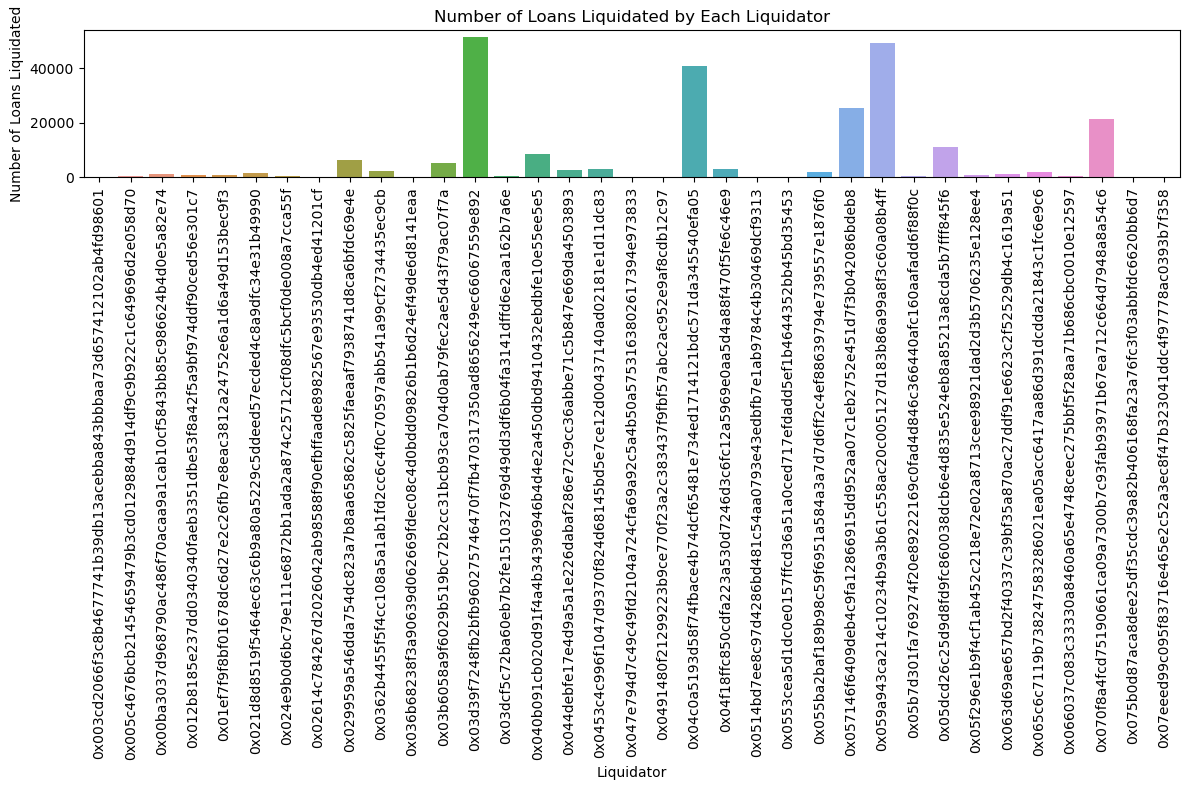

In [8]:
# Plot the number of loans liquidated by each liquidator
plt.figure(figsize=(12, 8))
sns.barplot(x='Liquidator', y='Number of Loans Liquidated', data=liquidators_loan_counts)
plt.title('Number of Loans Liquidated by Each Liquidator')
plt.xlabel('Liquidator')
plt.ylabel('Number of Loans Liquidated')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import pyarrow.parquet as pq
import requests
from io import BytesIO

# URLs of the loans files for all lending protocols
loans_parquet_urls = {
    "zklend": "https://storage.googleapis.com/derisk-persistent-state/zklend_data/loans.parquet",
    "nostra_alpha": "https://storage.googleapis.com/derisk-persistent-state/nostra_alpha_data/loans.parquet",
    "nostra_mainnet": "https://storage.googleapis.com/derisk-persistent-state/nostra_mainnet_data/loans.parquet",
    "hashstack_v0": "https://storage.googleapis.com/derisk-persistent-state/hashstack_v0_data/loans.parquet",
    "hashstack_v1": "https://storage.googleapis.com/derisk-persistent-state/hashstack_v1_data/loans.parquet"
}

# Load loans data
loans_dataframes = {}
for protocol, url in loans_parquet_urls.items():
    response = requests.get(url)
    response.raise_for_status()
    with BytesIO(response.content) as f:
        table = pq.read_table(f)
        df_lp = table.to_pandas()
    loans_dataframes[protocol] = df_lp


In [11]:
# Concatenate all loan dataframes into a single dataframe
loans_data = pd.concat(loans_dataframes.values(), ignore_index=True)
loans_data

,User,Protocol,Collateral (USD),Risk-adjusted collateral (USD),Debt (USD),Health factor,Standardized health factor,Collateral,Debt
0,0x4306021e30f9577351207140f90425b3e9e102ec5a42...,zkLend,5744.568231,4289.009524,22.162648,193.524234,193.524234,"USDC: 113.3876, USDT: 4610.7524, STRK: 904.5577","USDC: 10.0284, USDT: 10.0302, wstETH: 0.0006"
1,0x30b399e06903676ada3eccd5522e0cca4c4ad0101468...,zkLend,37.671463,30.137170,0.000000,inf,inf,ETH: 0.0126,
2,0x2f006034f567d5c2431bc4104b2cc7a1bf8f004bd00c...,zkLend,102.450086,81.960069,0.387499,211.510582,211.510582,"ETH: 0.0311, USDC: 6.5088, USDT: 3.0144",ETH: 0.0005
3,0x43e9ee859c0f85a6d5ab3f7ad26c50b9e9d8a8e10d0d...,zkLend,-5.156963,-4.125570,0.000000,inf,inf,,
4,0x22dd5ed1e4d359eca2e772ecefa57e31bb7756772850...,zkLend,213.311298,157.651127,0.000000,inf,inf,"wBTC: 0.0018, DAI: 23.1396, USDT: 83.3628",
...,...,...,...,...,...,...,...,...,...
1776229,0x681f8367c08ff6d5d0dbae1e56e507be26febfb370a4...,Hashstack V1,3176.346621,3176.346621,710.374010,4.471372,4.299396,"ETH: 0.2500, USDC: 2430.3083",ETH: 0.2378
1776230,0x218f5fb0764d06dcf0f3dd164e8dee8b0cc05ec5737a...,Hashstack V1,6354.847881,6354.847881,4729.237617,1.343736,1.292054,USDT: 6357.1810,USDT: 4730.9739
1776231,0x7eb374947887fd26a755635680d82d673b02535a57f0...,Hashstack V1,0.000000,0.000000,0.000000,inf,inf,,
1776232,0x665b55afc028c2a8139cf6ba13e08f672cc3aea28ca0...,Hashstack V1,1370.046456,1370.046456,1083.159962,1.264861,1.216212,"USDC: 1146.4060, USDT: 224.0242",USDC: 1083.4449


In [12]:
df_lp.columns

Index(['User', 'Protocol', 'Collateral (USD)',
       'Risk-adjusted collateral (USD)', 'Debt (USD)', 'Health factor',
       'Standardized health factor', 'Collateral', 'Debt'],
      dtype='object')

## Compute total liquidated debt


In [18]:
total_liquidated_debt = loans_data['Debt (USD)'].sum()

print(f'The total liquidated debt: {total_liquidated_debt} USD')

The total liquidated debt: 56463135.48412628 USD


# Compute total liquidated debt per token


In [14]:
liquidated_debt_per_token = loans_data.groupby('Collateral')['Debt (USD)'].sum()
liquidated_debt_per_token

Collateral
                                   354774.225291
DAI: 0.0105                             0.000000
DAI: 0.0106                             0.000000
DAI: 0.0106, STRK: 10.7496              0.000000
DAI: 0.0106, USDT: 0.0285               0.000000
                                       ...      
wstETH: 1.6668, STRK: 1318.5911      2911.558685
wstETH: 2.6195, STRK: 1032.9954         0.000000
wstETH: 2.6200                          0.000000
wstETH: 3.0496, STRK: 575.2484       6055.916080
wstETH: 7.3056, STRK: 1525.8100         0.000000
Name: Debt (USD), Length: 128188, dtype: float64

# Total liquidated debt per token in DataFrame


In [16]:
liquidated_debt_per_token_df = liquidated_debt_per_token.to_frame().reset_index()

liquidated_debt_per_token_df


,Collateral,Debt (USD)
0,,354774.225291
1,DAI: 0.0105,0.000000
2,DAI: 0.0106,0.000000
3,"DAI: 0.0106, STRK: 10.7496",0.000000
4,"DAI: 0.0106, USDT: 0.0285",0.000000
...,...,...
128183,"wstETH: 1.6668, STRK: 1318.5911",2911.558685
128184,"wstETH: 2.6195, STRK: 1032.9954",0.000000
128185,wstETH: 2.6200,0.000000
128186,"wstETH: 3.0496, STRK: 575.2484",6055.916080
